# Feature Selection In Wine Class Prediction Dataset

In this project we are going to use some Feature Selection techniques for selecting best features among the Original Data and then use it for further analysis.

# 1. Importing the Library

In [1]:
#Importing the necessary packages to process or plot the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 2. Loading the Dataset

In [2]:
#Importing the Dataset from the Sklearn
wine_data=datasets.load_wine()

In [3]:
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
#Target Value
wine_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
#Keys present in the Dataset
wine_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
#Creating the Dataframe from the dataset
'''Features that are present in the Dataset'''
features = pd.DataFrame(data=wine_data['data'],columns=wine_data['feature_names'])
data = features.copy()
data['target']=wine_data['target']
data['class']=data['target'].map(lambda ind: wine_data['target_names'][ind])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


# 3. What is the Structure of the DataFrame?

In [7]:
#Calling the .shape function to get the shape of the dataset
data.shape

(178, 15)

In [8]:
#Calling the describe function
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Missing or Null Points

In [9]:
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
class                           0
dtype: int64

From above we can see that, there is no missing value.

So we can move with the data ahead.

# 4. Feature Scaling

alcohol


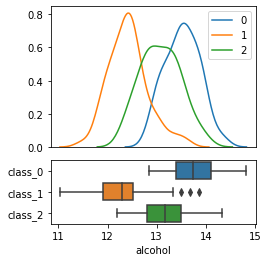

malic_acid


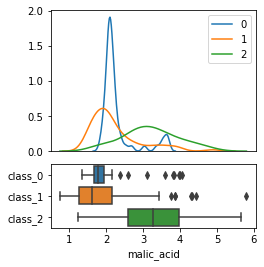

ash


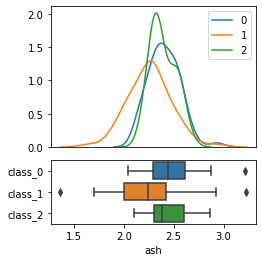

alcalinity_of_ash


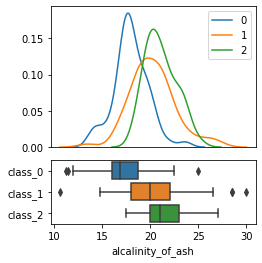

magnesium


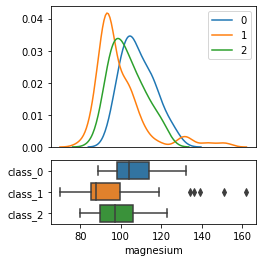

total_phenols


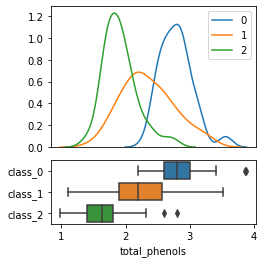

flavanoids


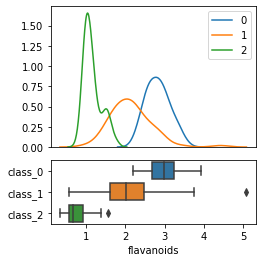

nonflavanoid_phenols


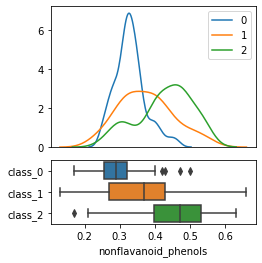

proanthocyanins


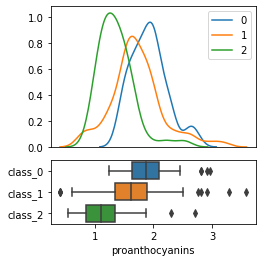

color_intensity


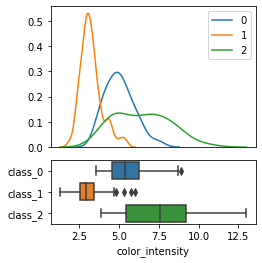

hue


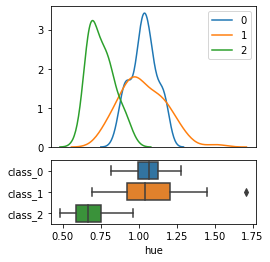

od280/od315_of_diluted_wines


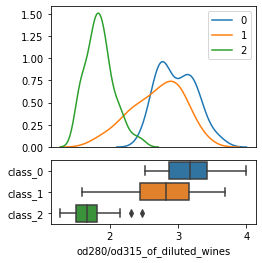

proline


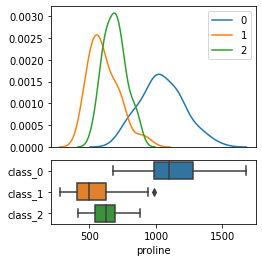

In [10]:
#Visualisation of all the features.
#However, note that this scales the y-axis so that the integral under each curve is 1.
import matplotlib.gridspec as gridspec
for feature in wine_data['feature_names']:
    print(feature)
    #sns.boxplot(data=data,x=data.target,y=data[feature])
    gs1 = gridspec.GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    sns.boxplot(x=feature,y='class',data=data,ax=ax2)
    sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
    sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
    sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
    ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    plt.show()

In [11]:
#Get the data as in x and y
data.drop('class',axis=1,inplace=True)
y=wine_data.target
X=features

## Using KBest Method

In [12]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                           Specs         Score
12                       proline  16540.067145
9                color_intensity    109.016647
6                     flavanoids     63.334308
4                      magnesium     45.026381
3              alcalinity_of_ash     29.383695
1                     malic_acid     28.068605
11  od280/od315_of_diluted_wines     23.389883
5                  total_phenols     15.623076
8                proanthocyanins      9.368283
0                        alcohol      5.445499


### Observations:
 * Here we will get the features with their importance score.
 * More the score, more the feature is important.
 * proline feature is having highest score while alcohol is having least in top 10

## Using ExtraTreesClassifier

[0.1293419  0.04278382 0.02748146 0.04238019 0.03885743 0.06534061
 0.14009298 0.02407905 0.02906369 0.13186934 0.07583615 0.10880055
 0.14407284]


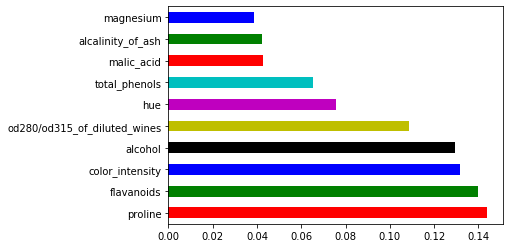

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
my_colors = list('rgbkymc')
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh',color=my_colors)
plt.show()

### Observations:
 * From above we can see that, we have the same set of features present as top 10 as like before in KBest.
 * Here the feature with more score is proline.
 * The 10th feature in this is alcalinity_of_ash

## Using HeatMap

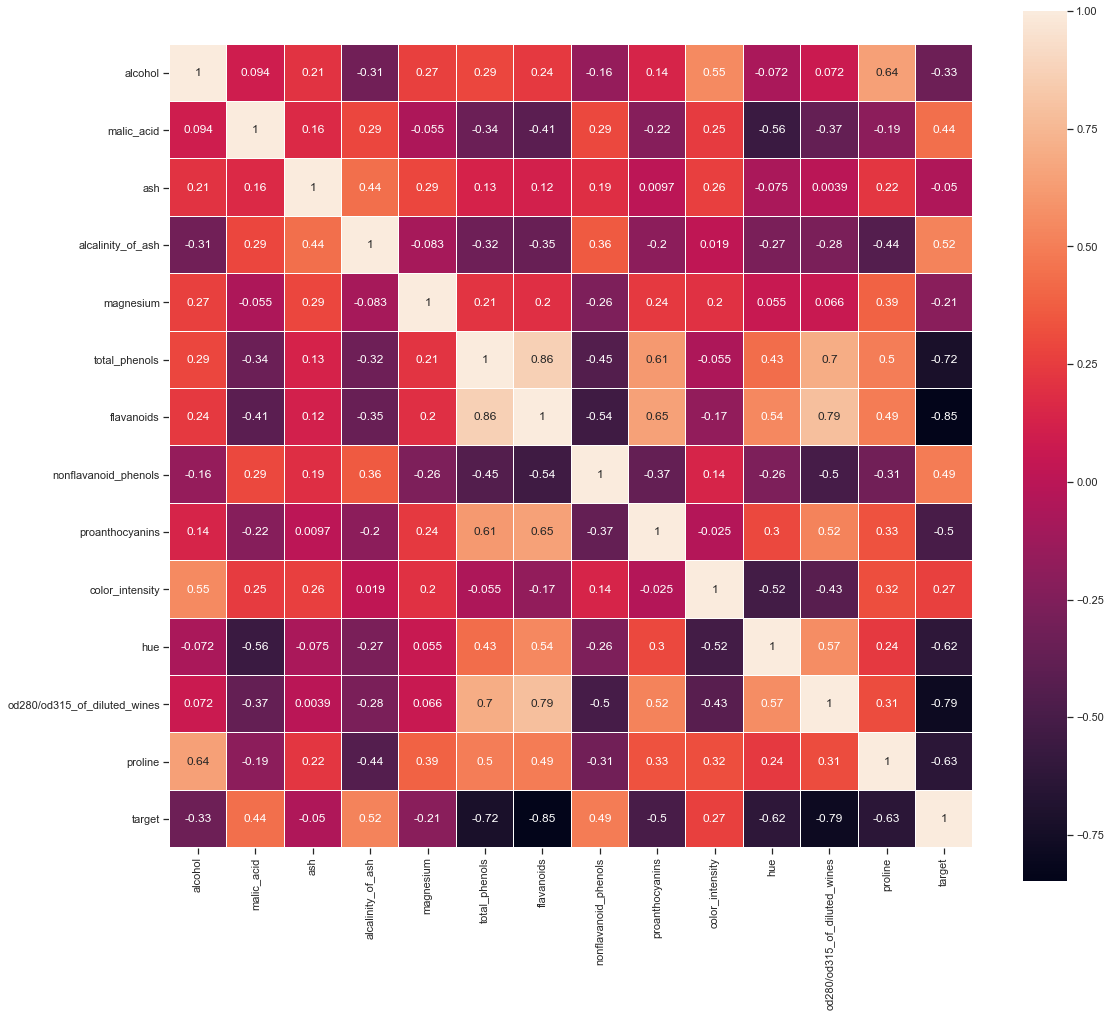

In [14]:
#Using the seaborn library for the heat map
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(18, 16))
sns.heatmap(data.astype(float).corr(), linewidths=0.1, square=True, linecolor='white', annot=True)
plt.show()

### Observations:
 * A heat map uses a warm-to-cool color spectrum to show dataset analytics, namely which parts of data receive the most            attention.
 * The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.
 * Here also the three features with less co-relations are 
     'ash':                  (-0.05)
     'nonflavanoid_phenols': (0.49)
     'proanthocyanins':      (-0.5)
 * So we are having the same set of features as we get from Kbest and ExtraTreeClassifier

# 5. Model Development for Prediction

In this section, we are going to develop Machine learning Inbuilt Classification Model for the Prediction of the class of the Wine.

## Splitting the Dataframe into test and train

Here we are taking the data with feature selection and without feature selection to check what changes in score we can observe.

In [15]:
#Original data i.e Without Feature selection
x1_train,x1_test,y1_train,y1_test=train_test_split(X,y,random_state=0)
x1_train.shape,y1_train.shape,x1_test.shape,y1_test.shape

((133, 13), (133,), (45, 13), (45,))

In [16]:
#Data after feature selection
#Here we will get the features from Kbest as in this dataset we are getting same features for all three
X_new=SelectKBest(chi2, k=10).fit_transform(X, y)
x2_train,x2_test,y2_train,y2_test=train_test_split(X_new,y,random_state=0)
x2_train.shape,y2_train.shape,x2_test.shape,y2_test.shape

((133, 10), (133,), (45, 10), (45,))

## Classification Model

Here we are going to define two classifier, one for Original data and another is for Feature selected data.

### Importing the Model

In [17]:
#For Original data
clf1=RandomForestClassifier()
clf2=RandomForestClassifier()

### Training of the Model

In [18]:
#Training of original Data
clf1.fit(x1_train,y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
#Training of Feature Selected Data
clf2.fit(x2_train,y2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Testing of the Model

In [20]:
#Testing of Original Data
y1_predict=clf1.predict(x1_test)

In [21]:
#Testing of Feature Selected Data
y2_predict=clf2.predict(x2_test)

### Accuracy of the Model

In [22]:
#Accuracy for the Original Model
accuracy_score(y1_test,y1_predict)

0.9777777777777777

In [23]:
#Accuracy for the Feature Selected Model
accuracy_score(y2_test,y2_predict)

0.9777777777777777

# 6. Conclusion

 * Here, we defined three types of Feature Selection Method.
 * In our dataset, we find that three of them are giving same set of important features.
 * We have also seen that removing these features didn't affect the accuracy of the model.So the Feature selection work.Since this is standard data might possible for other Datasets, Score might increase.